<a href="https://colab.research.google.com/github/Engineer-Ayesha-Shafique/Intrusion-Detection-System--UNSW_NB15/blob/main/IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNSW-NB15: Data Information

## Source/Useful Links

Get the data from: https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/

Refer: http://dx.doi.org/10.1080/19393555.2015.1125974


This dataset has been created by: Nour Moustafa, IEEE student Member, Jill Slay


## What is IDS (Intrusion Detection System)?

Intrusion Detection Systems (IDS) are precisely present to prevent attacks and infiltration to Networks, which might affect the organization. They monitor network traffic for suspicious activities and issue alert in case of issues.

**Types if IDS:**
> 1. *Signature-based intrusion detection*– In this kind incoming attacks are compared with pre-existing database of known attacks.
> 2. *Anomaly-based intrusion detection*- It uses statistics to form a baseline usage of the networks at different time intervals. They were introduced to detect unknown attacks.

Based on where they discover, they can be classified into:
1. Network intrusion detection (NIDS)
2. Host intrusion detection (HIDS)

## Problem Statement

With the rise of Internet usage, it is very important to protect Networks.  The most common risk to a network’s security is an intrusion such as brute force, denial of service or even an infiltration from within a network. With the changing patterns in network behavior, it is necessary to switch to a dynamic approach to detect and prevent such intrusions.

**Importance of this dataset:**

Although there were few daatset available before this dataset for NIDS, but they were generated decades ago and do not provide realistic outputs. That's why this dataset had been created by Nour Moustafa to tackle existing problems like: unbalanced dataset, missing values etc.

## Data Collection

This dataset has 4 CSV files of the data records and each CSV file contains attack and normal records.
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>

<tr>
<td> UNSWNB15_1.csv </td>
<td> 161.2 MB </td>
<td> 700000 </td>
<td> 49 </td>
</tr>

<tr>
<td> UNSWNB15_2.csv </td>
<td> 157.6 MB </td>
<td> 700000 </td>
<td> 49 </td>
</tr>

<tr>
<td> UNSWNB15_3.csv </td>
<td> 147.4 MB </td>
<td> 700000 </td>
<td> 49 </td>
</tr>

<tr>
<td> UNSWNB15_4.csv </td>
<td> 91.3 MB </td>
<td> 440044 </td>
<td> 49 </td>
</tr>
</table>


## Features in the Dataset

This dataset has 49 features.
<br>
There are 3 different datatypes:
- Categorical: proto, state, service, attack_cat
- Binary: is_sm_ips_ports, is_ftp_login
- Numerical: Rest of the features

## ML Problem Formulation

*Binary classification of attack category*

The dataset has "label" with 0 and 1 where 0 represents non-attack and 1 represent attack. So with the features available we will try to predict a given datapoint whether it belongs to attack or non-attack category.

## Performance Metrics

1. Accuracy
2. False Alarm Rate

# UNSW-NB15: Data cleaning and preprocessing

## Importing libraries

In [ ]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats

import pickle  # To load data int disk
from prettytable import PrettyTable  # To print in tabular format

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

%matplotlib inline

## Reading data

In [ ]:
# Creating a empty dict, where I will save all parameters required for test data transformation

saved_dict = {}

In [ ]:
# Reading datasets
dfs = []
for i in range(1,5):
    path = 'C:/Users/DELL/PycharmProjects/Intrusion Detection System- UNSW_NB15/data/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None))
all_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

In [ ]:
# This csv file contains names of all the features
df_col = pd.read_csv('C:/Users/DELL/PycharmProjects/Intrusion Detection System- UNSW_NB15/data/NUSW-NB15_features.csv', encoding='ISO-8859-1')

In [ ]:
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())

In [ ]:
# Renaming our dataframe with proper column names
all_data.columns = df_col['Name']

In [ ]:
# Saving useful info, later this will be used to transform raw test data
saved_dict['columns'] = df_col['Name'][df_col['Name']!='label'].tolist()

In [ ]:
del df_col

In [ ]:
all_data.shape

(2540047, 49)

In [ ]:
all_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


## Data cleaning and pre-processing

In [ ]:
# Splitting data into train and test
# All the operation like cleaning, EDA and FE will be done on train data only

train, test = train_test_split(all_data, test_size=0.3, random_state=16)

In [ ]:
# Deleting the concatenated dataframe, as we don't need that anymore
del all_data

In [ ]:
print(train.shape,'\n',test.shape)

(1778032, 49) 
 (762015, 49)


In [ ]:
# checking for null values
train.isnull().sum()

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

### Filling Null values

In [ ]:
train['attack_cat'].value_counts()

attack_cat
Generic             150906
Exploits             31507
 Fuzzers             13345
DoS                  11433
 Reconnaissance       8544
 Fuzzers              3569
Analysis              1855
Backdoor              1242
Reconnaissance        1220
 Shellcode             904
Backdoors              374
Shellcode              151
Worms                  120
Name: count, dtype: int64

In [ ]:
# We don't have "normal" values for "attack_cat", so we must fill Null values with "normal"
train['attack_cat'] = train.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [ ]:
train['attack_cat'].value_counts()

attack_cat
normal            1552862
generic            150906
exploits            31507
fuzzers             16914
dos                 11433
reconnaissance       9764
analysis             1855
backdoor             1242
shellcode            1055
backdoors             374
worms                 120
Name: count, dtype: int64

In [ ]:
train['ct_flw_http_mthd'] = train.ct_flw_http_mthd.fillna(value=0)

In [ ]:
# Even though it's a binary column, but there're values like 2 and 4
train['is_ftp_login'].value_counts()

is_ftp_login
0.0    746536
1.0     30329
4.0       109
2.0        21
Name: count, dtype: int64

In [ ]:
train['is_ftp_login'] = (train.is_ftp_login.fillna(value=0)).astype(int)

In [ ]:
# There are no Null values in the train data anymore
train.isnull().sum().sum()

0

## Information about dataset

In [ ]:
# Getting name of all the columns
train.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object', name='Name')

### Class distribution

In [ ]:
train_0, train_1 = train['label'].value_counts()[0] / len(train.index), train['label'].value_counts()[1] / len(train.index)
test_0, test_1 = test['label'].value_counts()[0] / len(test.index), test['label'].value_counts()[1] / len(test.index)

print("In Train: there are {} % of class 0 and {} % of class 1".format(train_0, train_1))
print("In Test: there are {} % of class 0 and {} % of class 1".format(test_0, test_1))

In Train: there are 0.8733599845222133 % of class 0 and 0.12664001547778667 % of class 1
In Test: there are 0.8738699369434985 % of class 0 and 0.1261300630565015 % of class 1


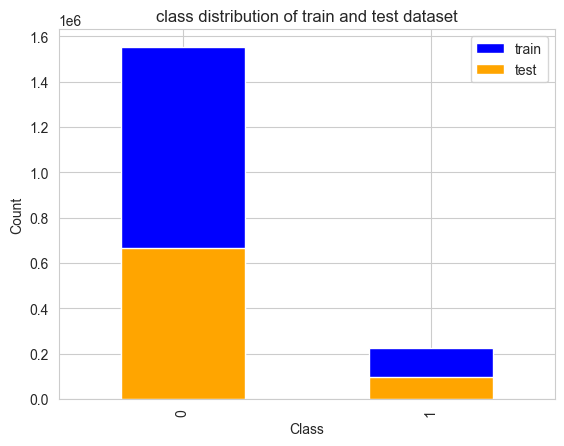

In [ ]:
# Plotting target label distribution
plt.figure()
plt.title("class distribution of train and test dataset")
train['label'].value_counts().plot(kind="bar", color='b', label="train")
test['label'].value_counts().plot(kind="bar", color='orange', label="test")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()

Both train and test datasets are highly imbalanced.<br>
Percentage of points belongs to class 1 (attack) is very little (only 12.6 %) in both of them.


### Datatype information of the Features

In [ ]:
# Check if any null value present in datasets
train.isnull().sum().sum(), test.isnull().sum().sum()  # No Null in train and test data is still raw

(0, 1499013)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778032 entries, 81030 to 2079982
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit           

In [ ]:
# All the datatypes in our dataset
train.dtypes.value_counts()

int64      28
float64    11
object      9
int32       1
Name: count, dtype: int64

In [ ]:
# Categorical feature names
train.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')

In [ ]:
# In the research paper it was mentioned that, this is a numerical feature not a categorical
train['ct_ftp_cmd'].unique()

array([0, ' ', 1, '1', '0', 5, 2, 3, 4, '4', 6, '2', 8], dtype=object)

In [ ]:
# Removing empty space and converting it to numerical
train['ct_ftp_cmd'] = train['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [ ]:
train['ct_ftp_cmd'].unique()

array([0, 1, 5, 2, 3, 4, 6, 8])

In [ ]:
# Categorical feature names
train.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'attack_cat'],
      dtype='object', name='Name')

In [ ]:
# Numeric features names
train.select_dtypes(include=np.number).columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object', name='Name')

**Observations:**
1. In this dataset there are mainly 2 types of data types present
    - numerical
    - categorical

2. Categorical columns: 'proto', 'service', 'state'

3. From the research paper we found that there are binary columns also-<br>
nummerical but binary: 'is_sm_ips_ports', 'is_ftp_login'

4. Numerical columns : 'id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd',
'ct_src_ltm', 'ct_srv_dst'

5. Target columns: 'attack_cat', 'label'

In [ ]:
# Info for test data transformation
saved_dict['binary_col'] = ['is_sm_ips_ports', 'is_ftp_login']

### Fixing values of the columns

In [ ]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(train[col].value_counts())
    print()

is_sm_ips_ports
0    1775116
1       2916
Name: count, dtype: int64

is_ftp_login
0    1747573
1      30329
4        109
2         21
Name: count, dtype: int64



The col "is_ftp_login" has few wrong values like 2, 4. It should only have 0 and 1, If the ftp session is accessed by user and
password then 1 else 0. Need to fix this.

Replacing all the values apart from 0 and 1 from these two columns.

In [ ]:
train['is_ftp_login'] = np.where(train['is_ftp_login']>1, 1, train['is_ftp_login'])

In [ ]:
train['is_ftp_login'].value_counts()

is_ftp_login
0    1747573
1      30459
Name: count, dtype: int64

In the feature "service" we have "-" we need to replace that.

In [ ]:
train['service'].value_counts()

service
-           872286
dns         547094
http        144555
ftp-data     88310
smtp         57160
ftp          34293
ssh          32897
pop3          1076
dhcp           124
ssl            109
snmp            81
radius          27
irc             20
Name: count, dtype: int64

In [ ]:
# removing all the "-" and replacing those with "None"
train['service'] = train['service'].apply(lambda x:"None" if x=="-" else x)

In [ ]:
train['service'].value_counts()

service
None        872286
dns         547094
http        144555
ftp-data     88310
smtp         57160
ftp          34293
ssh          32897
pop3          1076
dhcp           124
ssl            109
snmp            81
radius          27
irc             20
Name: count, dtype: int64

In [ ]:
# In the research paper there are not 10 unique values
train['attack_cat'].nunique()

11

In [ ]:
train['attack_cat'].value_counts()

attack_cat
normal            1552862
generic            150906
exploits            31507
fuzzers             16914
dos                 11433
reconnaissance       9764
analysis             1855
backdoor             1242
shellcode            1055
backdoors             374
worms                 120
Name: count, dtype: int64

In [ ]:
train['attack_cat'] = train['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

## Saving files to disk

In [ ]:
train.shape, test.shape

((1778032, 49), (762015, 49))

In [ ]:
train.to_csv('C:/Users/DELL/PycharmProjects/Intrusion Detection System- UNSW_NB15/target/train_alldata_EDA.csv', index=False)
test.to_csv('C:/Users/DELL/PycharmProjects/Intrusion Detection System- UNSW_NB15/target/test_alldata_EDA.csv', index=False)

In [ ]:
pickle.dump(saved_dict, open('C:/Users/DELL/PycharmProjects/Intrusion Detection System- UNSW_NB15/target/final_ipynb', 'wb'))

# UNSW-NB15: Exploratory Data Analysis

Performing EDA on the dataset in this notebook.

Below is my plan:
1. Correlation of the features and its heatmap
2. Pairplot between highly correlated features.
3. For all the categorial or columns with small number of unique values, countplot or barplot of those features.
4. For any numerical features, plot pdf

## Loading data from disk

In [ ]:
train = pd.read_csv('C:/Users/DELL/PycharmProjects/Intrusion Detection System- UNSW_NB15/target/train_alldata_EDA.csv')
test = pd.read_csv('C:/Users/DELL/PycharmProjects/Intrusion Detection System- UNSW_NB15/target/test_alldata_EDA.csv')

In [ ]:
train.shape, test.shape

In [ ]:
# Dividing the train data into attack and non-attack category
normal = train[train['label']==0]
anomaly = train[train['label']==1]

## Correlation
Getting correlation values for all the features.

Plot heatmap of correaltion for better visualization

### Utility functions

In [ ]:
def multi_corr(col1, col2="label", df=train):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
def corr(col1, col2="label", df=train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

In [ ]:
# Plotting the correlation matrix of the dataset
# Refer: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
#
method = "pearson"
# # correlation matrix
# corr_mat = train.corr(method=method)
#
# plt.figure(figsize=(12,12))
# sns.heatmap(corr_mat, square=True)
# plt.show()


# Convert non-numeric values to NaN
train = train.apply(pd.to_numeric, errors='coerce')

# Now, calculate the correlation matrix
corr_mat = train.corr(method=method)

# Plot the heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, square=True)
plt.show()


In [ ]:
# Getting and printing high correlated features
limit = 0.9

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")


Most correlated features are:
* sbytes, sloss
* dpkts, dbytes, dloss
* sttl, ct_state_ttl, label
* swin, dwin
* stime, dtime
* tcprtt, synack, ackdat
* ct_srv_src, ct_dst_src_ltm, ct_srv_dst
* ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm



## Pairplots of highly correlated features

### sbytes and sloss
1. These features are having very high corr between them more 95%
2. All the features are following a straight line except for the starting points that means they are having incresing relation with each other.

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['sbytes', 'sloss'])
plt.show()

### dpkts, dbytes and dloss
1. These features are also showing same charecteristics as above.
2. "dpkts" and "dbytes" are following a strainght line except for first few point and have 97% corr.
3. "dloss" and "dbytes" are completely following straight line with more than 99% corr.

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['dpkts', 'dbytes', 'dloss'])
plt.show()

### sttl, ct_state_ttl, label
1. sttl and ct_state_ttl are having 90% correlation between them.

But one important thing to notice that these 2 features are also highly correlated with target features i.e, label.

Going to drop 1 feature, and the remaining feature could play a vital role for the classification task.

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['sttl', 'ct_state_ttl', 'label'])
plt.show()

### swin, dwin
swin: Source TCP window advertisement, dwin: Destination TCP window advertisement

Correlation values is 99% between them. Even though these 2 columns are numerical but most of their values are only 0 and 255.

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['swin', 'dwin'])
plt.show()

### tcprtt, synack and ackdat
synack: The time between the SYN and the SYN_ACK packets of the TCP.
<br>
ackdat: The time between the SYN_ACK and the ACK ackets of the TCP.
<br>
tcprtt: sum of above 2 columns.

1. There are some similarity between "tcprtt" and "synack" and "tcsprtt" and "actdat" as value of x increases value of y also increases.
2. But for "synack" and "ackdat" values are scattered all over. And its corr value also not over 90%

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(train, vars=['tcprtt', 'synack', 'ackdat'])
plt.show()

### ct_srv_src, ct_srv_dst and ct_dst_src_ltm
1. Range of all the features are between 0 to 60.
2. Most of the values are close to 0 and less than 10.
3. Values are well scattered but there are clear line that means have some linear relationship.

In [ ]:
sns.pairplot(train, vars=['ct_srv_src', 'ct_srv_dst', 'ct_dst_src_ltm'])
plt.show()

### ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm and ct_dst_sport_ltm
1. values range from 0 to 60.
2. Most of the values are close to 0 and lesser than 20.
3. ct_dst_ltm highly corr with ct_dst_sport_ltm
4. ct_src_ltm corr with ct_src_dport_ltm
5. ct_src_dport_ltm corr with ct_dst_sport_ltm

In [ ]:
sns.pairplot(train, vars=['ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm'])
plt.show()

### Countplots and pdf of features

Utility functions

In [ ]:
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Plotting pdf of numerical columns
# Refer: https://www.kaggle.com/khairulislam/unsw-nb15-eda

def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    """
    This function plots pdf of the given feature on attack and non-attck data
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()

In [ ]:
def reduce_column(s, to_keep):
    """
    This function reduce categorical values of a given feature to values provided in to_keep list
    and make every other value "others"
    """
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

#### Attack Category
The name of each attack category. In this
data set, there are total nine categories of attack and normal is non-attack.

The data is highly imbalanced and have lots of non-attack than attacks.


In train data most occured attack data categories are "Generic", "Exploits", Fuzzers", "DoS" and "Reconnaissance"

In [ ]:
col_countplot('attack_cat')

#### Proto
Categorical feature. Transaction protocol


1. The no of unique values of 'proto' in dataset where attack is normal is 7 but in anamoly category its 129. So to plot it we are reducing the no of values.
2. Most of the values are consists of udp and tcp
3. For non-attacks count of tcp is lot higher
4. Considering the imbalce there are lots of udp cat for attacks

In [ ]:
train['proto'].nunique()

In [ ]:
normal['proto'].nunique(), anomaly['proto'].nunique()

In [ ]:
train['proto'].value_counts().head(10)*100/train.shape[0]

In [ ]:
to_keep = ['tcp', 'udp', 'unas', 'arp', 'ospf']
train['proto_reduced'] = train['proto'].apply(reduce_column, args=(to_keep,))

In [ ]:
col_countplot('proto_reduced')

#### Service
Categorical Features


1. In our dataset we can value "-" that is null, we need to remove that and replace it.
2. For normal there are lots of others that means most of "-" and few rare values.
3. In attack data "dns" is present higher than any other values. There are few no of others and http also.

In [ ]:
train['service'].nunique()

In [ ]:
train['service'].value_counts()

In [ ]:
to_keep = ['dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']
train['service_reduced'] = train['service'].apply(reduce_column, args=(to_keep,))

In [ ]:
col_countplot('service_reduced')

#### State
Categorical feature. The state and its dependent protocol

Reducing very rare values with "others" to plot and visualize better

1. For non-attacks "fin" is very frequent then "cons" almost half of "fin" and few "int" also.
2. In attack "int" is higher than normal cat values. That could be really important feature to detect. There are very few "fin"

In [ ]:
train['state'].nunique()

In [ ]:
train['state'].value_counts()

In [ ]:
to_keep = ['int', 'fin', 'con', 'req']
train['state_reduced'] = train['state'].apply(reduce_column, args=(to_keep,))

In [ ]:
col_countplot('state_reduced')

In [ ]:
train.drop(columns=['proto_reduced', 'state_reduced', 'service_reduced'], inplace=True)

In [ ]:
train.shape

#### ct_dst_ltm
Numerical feature.<br>
No. of connections of the same
destination address in 100 connections
according to the last time.

1. Range of values of this feature is about 0 to 70
2. For normal data most of the values are between 0 to 10 and few from 10 to 20.
3. For anomaly values are close to 0 and also there are values from 10 to 30.
4. Can visualize better after using log1p on the feature

In [ ]:
col = 'ct_dst_ltm'
train[col].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

In [ ]:
#### ct_flw_http_mthd
Numerical feature with small discreate set of values.<br>
No. of flows that has methods such as Get
and Post in http service.

1. For normal almost all the values are 0 and few 1.
2. In attack data everything is 0 and there is very very litle no of 1's

In [ ]:
train['ct_flw_http_mthd'].nunique()

In [ ]:
col_countplot('ct_flw_http_mthd')

#### ct_srv_src
Numerical feature.<br>
No. of connections that contain the same
service and source address in 100
connections according to the last time.
1. Range of the values is between 0 to 70.
2. For normal most of the values are from 0 to 15.
3. For anomaly most of the values are from 0 to 10 and the values are also distributed between 15 to 50.

In [ ]:
col = 'ct_srv_src'
train[col].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

#### ct_state_ttl
Numerical feature with small discrete set of values.
1. normal data has 0 as most of its values.
2. anomaly has most of its value 2.
3. There are few attack with value 1 to and also very little non-attack with 1.

In [ ]:
train['ct_state_ttl'].nunique()

In [ ]:
col_countplot('ct_state_ttl')

#### dinpkt
Numerical feature. Destination inter-packet arrival time (mSec)
1. This feature has 55 unique values.
2. Most of the non-attack data has value 1 and there are very very litte 2,3,4, 19,21,23 but they are very less in number not visible in the graoh also.
3. Attck data has value 0 most no of time but that is also way too little compared with non-attack data.

#### ct_dst_sport_ltm

In [ ]:
train['ct_dst_sport_ltm'].nunique()

In [ ]:
col_countplot('ct_dst_sport_ltm')

#### dintpkt
Numerical feature.
<br>
Destination inter-packet arrival time (mSec)
1. Feature has large range of values upto 60,000
2. For nonmal data there is a very high peek from 15,000 to 20,000
3. For attack data values are distributed in first 10000

In [ ]:
train['dintpkt'].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dintpkt')
plt.subplot(122)
dual_plot('dintpkt', method=np.log1p)
plt.show()

#### djit
Numerical feature. Destination jitter (mSec)
1. Range of this feature is huge upto 800,000.
2. Normal data distributed over very wide range upto 200,000.
3. For attack data there is a huge peek close to 0 and distributioon of values are very narrow.

In [ ]:
train['djit'].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('djit')
plt.subplot(122)
dual_plot('djit', method=np.log1p)
plt.show()

#### dload
Numerical feature. Destination bits per second
1. This feature has high correlation with target feat, 0.35
2. Feature has huge range of values upto 1e8
3. We can visualize better in log scale. For normal data they are distributed all over, has values close to 0 and also very large values
4. And for attack data all the values are very close to 0. IN log scale we can see that values are between 3 to 15

In [ ]:
train['dload'].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dload')
plt.subplot(122)
dual_plot('dload', method=np.log1p)
plt.show()

#### dbytes
Numerical feature. Destination to source bytes.
1. The range of values for this feature is very wide upto 1e7.
2. Values of normal categories are grouped together. In log scale can see there are values close to 0 and then from 5 to 12.
3. For attck category data values are widely spread. In log scale can see high peeks around 5 to 7.

In [ ]:
col = 'dbytes'
train[col].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

#### dmeansz
Numerical feature. Mean of the flow packet size transmitted by the dst
1. Feature range between 0 to 1600, with high corr with "label" 0.29
2. For non-attck data most values are between 0-200. And few of them are distributed from 400 to 800
3. Most of the values in anomaly from 0 to 100.

In [ ]:
col = 'dmeansz'
train[col].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

#### dpkts
Numerical feature. Destination to source packet count
1. Range of values for this feature is around 10,000
2. Non-attck cat values are very close to 0. In log scale its upto 5.
2. Attack cat values are widely distributed and has higher fraction around 2 and 3 in log1p graph

In [ ]:
train['dpkts'].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('dpkts')
plt.subplot(122)
dual_plot('dpkts', method=np.log1p)
plt.show()

#### dtcpb
Numerical features. Destination TCP sequence number
1. The range of this feature is very very wide 4*10^9
2. Values of normal cat are lot more wide spread than anomaly cat.
3. From the graphs its not much clear about the distribution.  But can see attack cat values are distributed through out total range.

In [ ]:
col = 'dtcpb'
train[col].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

#### dttl
Destination to source time to live
<br>
Numerical feature with only 11 unique value. Can plot it as categorical feature.


Destination to source time to live
1. MOst of the values for non-attack data is 29. There are some 0 and very few 252.
2. There lots of 0 in attack data, no of 0 in attack is more than non-attack, there are few 252 also and that is also higher than non-attack.

In [ ]:
train['dttl'].nunique()

In [ ]:
col_countplot('dttl')

#### dur
Numerical feature. Record total duration
1. Range of this feature is 0 to 8000
2. Both attack and non-attack cat values are very close to 0.
3. But attack cat values are widely distributed than non-attack.

In [ ]:
col = 'dur'
train[col].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

#### sintpkt
Numerical feature. Source inter-packet arrival time (mSec)
1. Most of the values in normat cat is close to 0 and spread to 400. And few values are also close to max value of the feature.
2. anomaly cat has most of values near to 0 and spread is less compared to normal

In [ ]:
train['sintpkt'].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot('sintpkt')
plt.subplot(122)
dual_plot('sintpkt', method=np.log1p)
plt.show()

#### sttl
Numerical feature with only 13 unique value.
<br>
Source to destination time to live
1. normal cat data has most of its values 31 and few 60.
2. anomaly cat has almost all of its value 254.

In [ ]:
train['sttl'].nunique()

In [ ]:
col_countplot("sttl")

#### stcpb
Numerical feature. Source TCP sequence number
1. The graphs are very similar to 'dtcpb'
1. normal cat has higher no of values close to 0 and has spread through out whole range
2. anomaly has most of its values near 0 and less spread compared to normal cat.


In [ ]:
col = 'stcpb'
train[col].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

#### swin
Numerical feature with 22 unique value.
<br>
Source TCP window advertisement
1. Most of the values of this feature are just 0 and 255
2. Normal cat data has most of its values 255 and 0
3. Attack act has large no of 0 and small no of 255, just the inverse of normal cat.

In [ ]:
train['swin'].nunique()

In [ ]:
col_countplot('swin')

#### sbytes
Source to destination bytes
<br>
Numerical feature with large range of values upto 1e7
1. Most of normal cat values are close to 0.
2. Attack cat has most of its values around 5 in log1p graph.
3. The spread of values is wider in attack compared to normal.

In [ ]:
col = 'sbytes'
train[col].nunique()

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
dual_plot(col)
plt.subplot(122)
dual_plot(col, method=np.log1p)
plt.show()

# UNSW-NB15: Feature Engineering

In [ ]:
# Loading data from disk
train = pd.read_csv('./train_alldata_EDA.csv')
test = pd.read_csv('./test_alldata_EDA.csv')

In [ ]:
# Utility function
def multi_corr(col1, col2="label", df=train):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
def corr(col1, col2="label", df=train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

## Removing highly correlated features

In [ ]:
# Selecting all the features with high correlation values with other features
# Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
# We don't want to use these features for plotting because these are having high corr
# And most likely have same kind of plots with already plotted feature
print(to_drop)

In [ ]:
saved_dict['corr_col'] = to_drop

In [ ]:
# removing the features from train and test data
train.drop(columns=to_drop, inplace=True)

In [ ]:
train.shape, test.shape

## Adding New Features

Refer: https://www.elastic.co/guide/en/ecs/master/ecs-network.html
* Network bytes: Total bytes trasferred by the network. It is sum of 'sbytes' (Source to destination bytes) and 'dbytes' (Destination to source bytes).

In [ ]:
# creating new features
train['network_bytes'] = train['sbytes'] + train['dbytes']

In [ ]:
train.shape, test.shape

In [ ]:
# Dropping columns which are not useful for the classification
# attack_cat is for multiclass classification
# all the other columns are address related and not present in sample train data
train.drop(['srcip', 'sport', 'dstip', 'dsport', 'attack_cat'], axis=1, inplace=True)

In [ ]:
# To use during test data transformation
saved_dict['to_drop'] = ['srcip', 'sport', 'dstip', 'dsport', 'attack_cat']

In [ ]:
train.shape, test.shape

## Applying log1p on Numerical columns

During EDA we found that few numerical columns shows better visualization for pdf curves if we apply log1p to the columns.

So I thought to try log1p on all the columns and check the correlation value of the original column and log1p column with target column i.e. "label"

In [ ]:
# Getting number of unique values of all the columns
# If the unique values are high that means it has continuous set of values
col_unique_values = train.nunique()

In [ ]:
# If the unique values are getter than some threshould than we will check its corr
col = col_unique_values[col_unique_values>200].index

In [ ]:
# Checking corr value of original col and log1p applied col
# Taking those columns whose unique values are getter than some threshould
for column in col:
    print("{:-^30}".format(column))
    multi_corr(column)

In [ ]:
# Will apply log1p on this columns and remove original columns
log1p_col = ['dur', 'sbytes', 'dbytes', 'sload', 'dload', 'spkts', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'sjit', 'djit', 'network_bytes']

In [ ]:
saved_dict['log1p_col'] = log1p_col

In [ ]:
# mode values of every features, will use to fill Null values of test
mode_dict = train.mode().iloc[0].to_dict()

In [ ]:
def log1p_transform(col, df=train):
    '''
    Apply log1p on given column.
    Remove the original cola and keep log1p applied col
    '''
    new_col = col+'_log1p'
    df[new_col] = df[col].apply(np.log1p)
    df.drop(col, axis=1, inplace=True)

In [ ]:
# Transforming columns with log1p
for col in log1p_col:
    log1p_transform(col, df=train)

In [ ]:
train.shape

In [ ]:
train.columns

In [ ]:
train.shape, test.shape

In [ ]:
# creating x and y set from the dataset
x_train, y_train = train.drop(columns=['label']), train['label']
x_test, y_test = test.drop(columns=['label']), test['label']

In [ ]:
print(x_train.shape, y_train.shape)
print()
print(x_test.shape, y_test.shape)

In [ ]:
# Saving all the files to disk to use later
pickle.dump((x_train, y_train), open('.final_ipynb/final_train.pkl', 'wb'))
pickle.dump((x_test, y_test), open('.final_ipynb/final_test.pkl', 'wb'))

In [ ]:
# getting categorical and numerical columns in 2 diff lists
cat_col = ['proto', 'service', 'state']
num_col = list(set(x_train.columns) - set(cat_col))

In [ ]:
# To use later, during test data cleaning
saved_dict['cat_col'] = cat_col
saved_dict['num_col'] = num_col

In [ ]:
x_train.head()

## Standardizing
    
As we have seen that the range of few features in this dataset is very large. So we will keep everything within certain range by applying standardscaler. After this all the features will have mean 0 and std 1

In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_col])

In [ ]:
x_train[num_col] = scaler.transform(x_train[num_col])

In [ ]:
x_train.head()

## Onehot Encoding

In our dataset we have few categorical columns with text data.
But ML models can't process text data it can process numbers.

So we have to convert categorical columns to numerical columns in some way.
We will use onehotencoder where we will assign 1 if the value is present for the row and rest of the columns will be 0.

In [ ]:
# Onehot Encoding
service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()
ohe_service = service_.fit(x_train.service.values.reshape(-1,1))
ohe_proto = proto_.fit(x_train.proto.values.reshape(-1,1))
ohe_state = state_.fit(x_train.state.values.reshape(-1,1))

In [ ]:
# We are onehot encoding the given column
# Remove the original categorical column
for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
    x = ohe.transform(x_train[col].values.reshape(-1,1))
    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
    x_train = pd.concat([x_train.drop(col, axis=1), tmp_df], axis=1)

In [ ]:
x_train.head()

**Saving** all the important parameters and objects to disk so that we can apply same process on test data

In [ ]:
file_path = 'final_ipynb/'

In [ ]:
pickle.dump(scaler, open(file_path+'scaler.pkl', 'wb'))  # Standard scaler
pickle.dump(saved_dict, open(file_path+'saved_dict.pkl', 'wb'))  # Dictionary with important parameters
pickle.dump(mode_dict, open(file_path+'mode_dict.pkl', 'wb'))  #  Dictionary with most frequent values of columns

In [ ]:
# Onehot encoder for categorical columns
pickle.dump(ohe_proto, open(file_path+'ohe_proto.pkl', 'wb'))
pickle.dump(ohe_service, open(file_path+'ohe_service.pkl', 'wb'))
pickle.dump(ohe_state, open(file_path+'ohe_state.pkl', 'wb'))

In [ ]:
# Cleaned and processed train data
pickle.dump((x_train, y_train), open(file_path+'final_train.pkl', 'wb'))

## Pipeline functions

We have to prepare a pipeline, where we can send raw data and get the output.

We will use test data to implement the pipeline. Here we will use all the parameters we have saved using train data.

Also standardize and onehot encode test data using train data objects for standardscaler and onehotencoder.

In [ ]:
def clean_data(data):
    '''
    Cleans given raw data. Performs various cleaning, removes Null and wrong values.
    Check for columns datatype and fix them.
    '''
    numerical_col = data.select_dtypes(include=np.number).columns  # All the numerical columns list
    categorical_col = data.select_dtypes(exclude=np.number).columns  # All the categorical columns list

    # Cleaning the data
    for col in data.columns:
        val = mode_dict[col]  # Mode value of the column in train data
        data[col] = data[col].fillna(value=val)
        data[col] = data[col].replace(' ', value=val)
        data[col] = data[col].apply(lambda x:"None" if x=="-" else x)

        # Fixing binary columns
        if col in saved_dict['binary_col']:
            data[col] = np.where(data[col]>1, val, data[col])

    # Fixing datatype of columns
    bad_dtypes = list(set(categorical_col) - set(saved_dict['cat_col']))
    for bad_col in bad_dtypes:
        data[col] = data[col].astype(float)

    return data

In [ ]:
def apply_log1p(data):
    '''
    Performs FE on the data. Apply log1p on the specified columns create new column and remove those original columns.
    '''
    for col in saved_dict['log1p_col']:
        new_col = col + '_log1p'  # New col name
        data[new_col] = data[col].apply(np.log1p)  # Creating new column on transformed data
        data.drop(col, axis=1, inplace=True)  # Removing old columns
    return data

In [ ]:
def standardize(data):
    '''
    Stanardize the given data. Performs mean centering and varience scaling.
    Using stanardscaler object trained on train data.
    '''
    data[saved_dict['num_col']] = scaler.transform(data[saved_dict['num_col']])
    return data

In [ ]:
def ohencoding(data):
    '''
    Onehot encoding the categoricla columns.
    Add the ohe columns with the data and removes categorical columns.
    Using Onehotencoder objects trained on train data.
    '''

    # Onehot encoding cat col using onehotencoder objects
    X = ohe_service.transform(data['service'].values.reshape(-1, 1))
    Xm = ohe_proto.transform(data['proto'].values.reshape(-1, 1))
    Xmm = ohe_state.transform(data['state'].values.reshape(-1, 1))

    # Adding encoding data to original data
    data = pd.concat([data,
                      pd.DataFrame(Xm.toarray(), columns=['proto_'+i for i in ohe_proto.categories_[0]]),
                      pd.DataFrame(X.toarray(), columns=['service_'+i for i in ohe_service.categories_[0]]),
                      pd.DataFrame(Xmm.toarray(), columns=['state_'+i for i in ohe_state.categories_[0]])],
                      axis=1)

    # Removing cat columns
    data.drop(['proto', 'service', 'state'], axis=1, inplace=True)

    return data

Loading all the objects from disk, that we have trained on train data.

In [ ]:
# Parametrs
saved_dict = pickle.load(open(file_path+'saved_dict.pkl', 'rb'))
# Mode value of all the columns
mode_dict = pickle.load(open(file_path+'mode_dict.pkl', 'rb'))
# Stanardscaler object
scaler = pickle.load(open(file_path+'scaler.pkl', 'rb'))

In [ ]:
# One hot encoder objects
ohe_proto = pickle.load(open(file_path+'ohe_proto.pkl', 'rb'))
ohe_service = pickle.load(open(file_path+'ohe_service.pkl', 'rb'))
ohe_state = pickle.load(open(file_path+'ohe_state.pkl', 'rb'))

In [ ]:
x_test.shape

In [ ]:
# Resetting index of test data
x_test.reset_index(drop=True, inplace=True)

In [ ]:
x_test.shape

In [ ]:
x_test.columns

In [ ]:
# Adding column names
x_test.columns = saved_dict['columns']

In [ ]:
# Creating new Feature
x_test['network_bytes'] = x_test['dbytes'] + x_test['sbytes']

In [ ]:
# Droping all the unwanted columns
dropable_col = saved_dict['to_drop'] + saved_dict['corr_col']
x_test.drop(columns=dropable_col, inplace=True)

In [ ]:
x_test.shape

In [ ]:
# Cleaning data using clean_data()
x_test = clean_data(x_test)

In [ ]:
x_test.shape

In [ ]:
# FE: applying log1p using apply_log1p()
x_test = apply_log1p(x_test)

In [ ]:
x_test.shape

In [ ]:
x_test.columns

In [ ]:
# Standardscaling using stanardize()
x_test = standardize(x_test)

In [ ]:
x_test.head()

In [ ]:
# Onehot encoding categorical columns using ohencoding()
x_test = ohencoding(x_test)

In [ ]:
x_test.shape

In [ ]:
# Final test data
x_test.head()

In [ ]:
# Matching test data columns with train data columns
all(x_train.columns == x_test.columns)

# UNSW-NB15: Machine Learning Models

In [ ]:
file_path = "./final_ipynb"

## Loading files

In [ ]:
# Train and Test data
x_train, y_train = pickle.load(open(file_path+'/final_train.pkl', 'rb'))
x_test, y_test = pickle.load(open(file_path+'/final_test.pkl', 'rb'))

# Dictionaries
saved_dict = pickle.load(open(file_path+'/saved_dict.pkl', 'rb'))
mode_dict = pickle.load(open(file_path+'/mode_dict.pkl', 'rb'))

# Standard scaler
scaler = pickle.load(open(file_path+'/scaler.pkl', 'rb'))

# Onehot encoders
ohe_proto = pickle.load(open(file_path+'/ohe_proto.pkl', 'rb'))
ohe_service = pickle.load(open(file_path+'/ohe_service.pkl', 'rb'))
ohe_state = pickle.load(open(file_path+'/ohe_state.pkl', 'rb'))

In [ ]:
# Making the train data sparse matrix
x_train_csr = csr_matrix(x_train.values)

col = x_train.columns

# Creating sparse dataframe with x_train sparse matrix
x_train = pd.DataFrame.sparse.from_spmatrix(x_train_csr, columns=col)

In [ ]:
# Saving it to disk to use later
pickle.dump((x_train, y_train), open(file_path+'/train_sparse.pkl', 'wb'))

# Loading sparse data
x_train, y_train = pickle.load(open(file_path+'/train_sparse.pkl', 'rb'))

In [ ]:
x_train.sparse.to_dense().head()

In [ ]:
x_train.shape, y_train.shape

## Pipeline functions

In [ ]:
#------------------------------------------------------------------------------------------
# Data Cleaning
#------------------------------------------------------------------------------------------
def clean_data(data):
    '''
    Cleans given raw data. Performs various cleaning, removes Null and wrong values.
    Check for columns datatype and fix them.
    '''
    numerical_col = data.select_dtypes(include=np.number).columns  # All the numerical columns list
    categorical_col = data.select_dtypes(exclude=np.number).columns  # All the categorical columns list

    # Cleaning the data
    for col in data.columns:
        val = mode_dict[col]  # Mode value of the column in train data
        data[col] = data[col].fillna(value=val)
        data[col] = data[col].replace(' ', value=val)
        data[col] = data[col].apply(lambda x:"None" if x=="-" else x)

        # Fixing binary columns
        if col in saved_dict['binary_col']:
            data[col] = np.where(data[col]>1, val, data[col])

    # Fixing datatype of columns
    bad_dtypes = list(set(categorical_col) - set(saved_dict['cat_col']))
    for bad_col in bad_dtypes:
        data[col] = data[col].astype(float)

    return data

#------------------------------------------------------------------------------------------
# Feature Engineering: Apply log1p
#------------------------------------------------------------------------------------------
def apply_log1p(data):
    '''
    Performs FE on the data. Apply log1p on the specified columns create new column and remove those original columns.
    '''
    for col in saved_dict['log1p_col']:
        new_col = col + '_log1p'  # New col name
        data[new_col] = data[col].apply(np.log1p)  # Creating new column on transformed data
        data.drop(col, axis=1, inplace=True)  # Removing old columns
    return data

#------------------------------------------------------------------------------------------
# Standardizing: Mean centering an d varience scaling
#------------------------------------------------------------------------------------------
def standardize(data):
    '''
    Stanardize the given data. Performs mean centering and varience scaling.
    Using stanardscaler object trained on train data.
    '''
    data[saved_dict['num_col']] = scaler.transform(data[saved_dict['num_col']])
    return data

#------------------------------------------------------------------------------------------
# Onehot encoding of categorical columns
#------------------------------------------------------------------------------------------
def ohencoding(data):
    '''
    Onehot encoding the categoricla columns.
    Add the ohe columns with the data and removes categorical columns.
    Using Onehotencoder objects trained on train data.
    '''
    # Onehot encoding cat col using onehotencoder objects
    X = ohe_service.transform(data['service'].values.reshape(-1, 1))
    Xm = ohe_proto.transform(data['proto'].values.reshape(-1, 1))
    Xmm = ohe_state.transform(data['state'].values.reshape(-1, 1))

    # Adding encoding data to original data
    data = pd.concat([data,
                      pd.DataFrame(Xm.toarray(), columns=['proto_'+i for i in ohe_proto.categories_[0]]),
                      pd.DataFrame(X.toarray(), columns=['service_'+i for i in ohe_service.categories_[0]]),
                      pd.DataFrame(Xmm.toarray(), columns=['state_'+i for i in ohe_state.categories_[0]])],
                      axis=1)

    # Removing cat columns
    data.drop(['proto', 'service', 'state'], axis=1, inplace=True)
    return data

In [ ]:
def get_final_data(data, saved_dict=saved_dict, mode_dict=mode_dict):
    '''
    This functions takes raw input and convert that to model required output.
    '''
    data.reset_index(drop=True, inplace=True)
    data.columns = saved_dict['columns']

    data['network_bytes'] = data['dbytes'] + data['sbytes']

    dropable_col = saved_dict['to_drop'] + saved_dict['corr_col']
    data.drop(columns=dropable_col, inplace=True)

    data = clean_data(data)
    data = apply_log1p(data)
    data = standardize(data)
    data = ohencoding(data)

    return data

## Training and validation of models

In [ ]:
# Using pipeline to prepare test data
x_test = get_final_data(x_test)

In [ ]:
# Making test data sparse matrix
x_test_csr = csr_matrix(x_test.values)
col = x_test.columns

# Creating x_test sparse dataframe
x_test = pd.DataFrame.sparse.from_spmatrix(x_test_csr, columns=col)

In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape

In [ ]:
all(x_train.columns == x_test.columns)

### Utility functions

In [ ]:
def false_alarm_rate(y_true, y_pred):
    """
    This function will return False Alarm Rate for given true and predicted values.
    False Alarm Rate is average of False Negetive Rate and False Positive Rate
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)  # False positive rate
    FNR = fn / (fn + tp)  # False negetive rate
    return (FPR+FNR)/2  # False alarm rate

In [ ]:
def hyperparam_tuning(clf, parameters, x, y, method='gridsearch', cv=None):
    """
    Utility function for Tuning hyperparameters
    """
    # initialization
    scoring = {'auc':'roc_auc',
               'f1':'f1',
               'FAR':make_scorer(false_alarm_rate, greater_is_better=False)}  # using custom scoring function FAR.

    # param tuning
    if method=='gridsearch':
        # As we are using multi scoring, So we need to point refit to scoring function with which we want to evaluate score
        tuning_clf = GridSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                  cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)

    elif method=='randomsearch':
        tuning_clf = RandomizedSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                        cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)

    return result

In [ ]:
def result_visualization(tuned_clf, parameters, param1=None, param2=None):
    """
    Utility function to plot the results obtained after hyper parameter tuning
    """
    # getting train and test scores to plot
    train_score = tuned_clf.cv_results_['mean_train_auc']
    test_score = tuned_clf.cv_results_['mean_test_auc']

    # print results
    print("Best Score: {}".format(tuned_clf.best_score_))
    print("Best Parameters: {}".format(tuned_clf.best_params_))

    # Want to visualize score with 2 params, plot heatmap of the 3 variables
    if param2 is not None:
        # heatmap
        train_cmap=sns.light_palette("green")
        test_cmap=sns.light_palette("blue")

        # Figure and axis
        fig = plt.figure(figsize=(20,5))
        train_ax = fig.add_subplot(1,2,1)
        test_ax = fig.add_subplot(1,2,2)

        # train heatmap
        sns.heatmap(train_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=train_cmap, annot=True, fmt='.4f', ax=train_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])

        # test heapmap
        sns.heatmap(test_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=test_cmap, annot=True, fmt='.6f', ax=test_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])

        # axis labels and plot title
        train_ax.set_title("Train hyperparam heatmap")
        train_ax.set_xlabel(param2)
        train_ax.set_ylabel(param1)

        test_ax.set_title("Test hyperparam heatmap")
        test_ax.set_xlabel(param2)
        test_ax.set_ylabel(param1)
        plt.show()

    # Want to visualize score with one param, simply plot score and param
    else:
        plt.figure(figsize=(10,5))
        plt.plot(np.log10(parameters[param1]), train_score, label="train")
        plt.plot(np.log10(parameters[param1]), test_score, label="test")

        # Plot for train data
        for i, txt in enumerate(train_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], train_score[i]))

        # Plot for test data
        for i, txt in enumerate(test_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], test_score[i]))

        plt.xlabel(param1)
        plt.ylabel('performance')
        plt.grid()
        plt.legend()
        plt.show()

In [ ]:
def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):
    """
    Utility function to get result on test data from best found classifier using hyper parameter tuning.
    Print the accuracy and False Alarm Rate for both train and test.
    Plot confusion matrix of train and test.
    """
    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']

    # Training te best model
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)  # prediction on train data
    y_test_pred = clf.predict(x_test)  # prediction on test data

    # auc curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    # Scores of train dataset
    train_auc = auc(train_fpr, train_tpr)
    train_f1 = f1_score(y_train, y_train_pred)
    train_far = false_alarm_rate(y_train, y_train_pred)

    # Scores of test dataset
    test_auc = auc(test_fpr, test_tpr)
    test_f1 = f1_score(y_test, y_test_pred)
    test_far = false_alarm_rate(y_test, y_test_pred)

    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1, test_far])
    print(x)

    # Plot AUC curve
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Confusion martix of train and test
    # Train confusion matrix
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Train Confusion Matrix")

    # Test confusion matrix
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.show()

    # Returning scores of test data
    return clf, test_auc, test_f1, test_far




### Logistic Regression

We are starting with basic Logistic Regression for training our data.

Going tune hyperparameter "alpha" and "penalty"

In [ ]:
# Tuning "alpha" for l2 "penalty"
clf = SGDClassifier(loss='log', penalty='l2')
param = {'alpha':np.logspace(-6, 1, 8)}  # Values of alpha

lr_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

In [ ]:
# Plotting the result to select best parameter
result_visualization(lr_clf, param, param1='alpha')

In [ ]:
# Tuning "alpha" for l1 "penalty"
clf = SGDClassifier(loss='log', penalty='l1')
param = {'alpha':np.logspace(-6, 1, 8)}  # Values of alpha

lr_clf = hyperparam_tuning(clf, param, x_train_csr, y_train)

In [ ]:
# Plotting alpha vs score
result_visualization(lr_clf, param, 'alpha')

In [ ]:
# Best LR model
lr_bst_clf = SGDClassifier(penalty='l1', alpha=1e-6)

In [ ]:
# Getting best model's performance on train and test data
lr_clf, lr_auc, lr_f1, lr_far = evaluate_result(lr_bst_clf, x_train, y_train, x_test, y_test, 'LR')

**Observation**
1. Using wide range of values for "alpha" from 10^-6 to 10^3 and "penalty" l1 and l2
2. Can observe that upto alpha=0.1 model's score is good and then its falling down heavily.
3. The best parameter of the model for our data is "penalty" l1 and "alpha" 10^-6
4. Both train and test auc score are very close that means model is not overfitting.
5. Model is performing well but there are few False Positive points in the result

In [ ]:
# An empty dictionary to store the result of all the models
result_dict = {"name":[], "auc":[], "f1":[], "far":[]}

In [ ]:
# Storinig result for LR
result_dict['name'].append("LR")
result_dict['auc'].append(lr_auc)
result_dict['f1'].append(lr_f1)
result_dict['far'].append(lr_far)

In [ ]:
pickle.dump(lr_clf, open(file_path+'/lr_clf.pkl', 'wb'))

In [ ]:
result_dict

### Linear SVC
The next model we are going to try is Linear Support Vector Classifier

Tune parameters for "alpha" and "penalty"



In [ ]:
# Tuning "alpha" and "penalty"
clf = SGDClassifier(loss='hinge')
param = {'alpha':[10**x for x in range(-5,3)],  # Values for alpha
         'penalty':['l1', 'l2']}  # l1 an d l2 penalty

svm_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

In [ ]:
# Visualising scores, using heatmap to check the performance on "alpha" and "penalty"
result_visualization(svm_clf, param, 'alpha', 'penalty')

In [ ]:
# Best svc model
best_svm_clf = svm_clf.best_estimator_

In [ ]:
# Model performance on train and test
svm_clf, svm_auc, svm_f1, svm_far = evaluate_result(clf, x_train_csr, y_train, x_test_csr, y_test, "SVM")

**Observation**
1. Using wide range of "alpha" values from 10^-5 to 10^2 and l1, l2 "penalty"
2. For penalty=l1 model is behaving like a random model with auc=0.5 from alpha=1 to 100.
3. Best set of parameters for the model is alpha=10^-4 and penalty=l2
4. Train and Test score is very close so no overfitting here, getting better value of auc and FAR tha Logistic Regression
5. FAR value of this model is really good. The no of FP increased than LR but there are very few FN points in the result.

In [ ]:
# Saving result of SVM
result_dict['name'].append("SVM")
result_dict['auc'].append(svm_auc)
result_dict['f1'].append(svm_f1)
result_dict['far'].append(svm_far)

In [ ]:
pickle.dump(svm_clf, open(file_path+'/svm_clf.pkl', 'wb'))

In [ ]:
pickle.dump(result_dict, open('result_dict.pkl', 'wb'))

### Decision Tree
Trying out DT for the next model.

Tune parameters for "max_depth", "min_samples_split" and "min_samples_leaf"

In [ ]:
# DT classifier
clf = DecisionTreeClassifier()
param = {'max_depth':[8, 10, 12, 14],
         'min_samples_split':[2, 4, 6]}

dt_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

In [ ]:
# Plotting heatmap of scores with params
result_visualization(dt_clf, param, 'max_depth', 'min_samples_split')

In [ ]:
dt_clf.best_estimator_

In [ ]:
# Tuning "min_samples_leaf" on top of best found params
clf = dt_clf.best_estimator_
param = {'min_samples_leaf':[9, 11, 13]}

dt_clf = hyperparam_tuning(clf, param, x_train_csr, y_train,cv=3)

In [ ]:
result_visualization(dt_clf, param, 'min_samples_leaf')

Best value of "min_samples_leaf" is 11

In [ ]:
dt_param = {'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf':9}

dt_best_clf = DecisionTreeClassifier(**dt_param)

In [ ]:
dt_clf, dt_auc, dt_f1, dt_far = evaluate_result(dt_best_clf, x_train_csr, y_train, x_test_csr, y_test, 'DT')

In [ ]:
# Saving the Model to disk
pickle.dump(dt_clf, open(file_path+'/dt_clf.pkl', 'wb'))

In [ ]:
result_dict = pickle.load(open('./result_dict.pkl', 'rb'))

In [ ]:
# Saving scores of DT
result_dict['name'].append("DT")
result_dict['auc'].append(dt_auc)
result_dict['f1'].append(dt_f1)
result_dict['far'].append(dt_far)

In [ ]:
result_dict

**Observation**
1. Tuning parameters for "max_depth", "min_sampples_split" and "min_samples_leaf".
2. Performance is mostly dependent on "max_depth" and less dependent on other 2 params.
3. Best parameters for the model max_depth=10, min_samples_split=6 and min_samples_leaf=9
4. Train and Test score is very close so no overfitting here, getting better value of F1 score with this model than the other 2 abve.
5. NO of False Positive reduced for this model.

## Cross Validation function

For Random Forest and XGBClassifier, we will tuning its hyperparameters with train and cv data and using loops. Because the dataset is very large and with grid or randomsearch it will take so much time.

In [ ]:
# Splitting train in train and cv data
x_train_new_csr, x_cv_csr, y_train, y_cv = train_test_split(x_train_csr, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train_new_csr.shape, y_train.shape, x_cv_csr.shape, y_cv.shape, x_test_csr.shape, y_test.shape

In [ ]:
def cross_validation(clf_name, param, param_tune,
                     x_train=x_train_new_csr, y_train=y_train, x_cv=x_cv_csr, y_cv=y_cv):
    """
    Using this function to cross validate with train and cv data.
    Parameters:
        clf_name = Name of the classifier
        param = Dictionary of hyperparameters and params for classifier
        param_tune = Name of the parameter to tune
        x_train, y_train = Train data and Train label
        x_cv, y_cv = CV data and CV label
    """
    # Initializing empty list to store train and cv scores
    train_auc_list = []
    cv_auc_list = []

    # Assigning arguments to variables
    hyper_param = param_tune
    values = param.pop(hyper_param)
    classifier = clf_name

    # Looping through the list of hyper parameter
    for i in tqdm(values):
        clf = classifier(**{hyper_param:i}, **param, n_jobs=-1)
        clf.fit(x_train, y_train)  # Training

        # Predicting probability of targets
        y_train_pred = clf.predict_proba(x_train)[:,1]
        y_cv_pred = clf.predict_proba(x_cv)[:,1]

        # Getting scores
        train_auc_list.append(roc_auc_score(y_train, y_train_pred))
        cv_auc_list.append(roc_auc_score(y_cv, y_cv_pred))

        print("For {}: {}, train auc: {} and test auc {}".format(hyper_param, i, train_auc_list[-1], cv_auc_list[-1]))

    # Plotting scores
    plt.figure(figsize=(10,5))
    plt.plot(values, train_auc_list, label="train")
    plt.plot(values, cv_auc_list, label="cv")

    for i, txt in enumerate(train_auc_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], train_auc_list[i]))
    for i, txt in enumerate(cv_auc_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], cv_auc_list[i]))

    plt.xlabel(hyper_param)
    plt.ylabel('auc score')
    plt.grid()
    plt.legend()
    plt.show()

    # Finding best parameter with highest cv score
    best_param = np.argmax(cv_auc_list)
    clf = classifier(**{hyper_param:values[best_param]}, **param)  # Trained model

    return clf, hyper_param, values[best_param]

### Random Forest

Trying Random Forest Classifier next.
<br>
Tuning 'n_estimators', 'max_depth', 'min_samples_split' and 'criterion'

In [ ]:
# Classifier Name
CLF_NAME = RandomForestClassifier

In [ ]:
# Tuning No of estimators
param = {'n_estimators':[100, 200, 300, 400]}
rf_clf, param1, val1 = cross_validation(CLF_NAME, param, 'n_estimators')

In [ ]:
# Tuning Max depth
param = {'max_depth':[20, 22, 24]}
dt_clf, param2, val2 = cross_validation(CLF_NAME, param, 'max_depth')

In [ ]:
# Tuning Min samples split
param = {'min_samples_split':[2, 4, 6], 'max_depth':22}
dt_clf = cross_validation(CLF_NAME, param, 'min_samples_split')

In [ ]:
# Tuning Criterion
param = {'criterion':['gini', 'entropy'], 'min_samples_split':6, 'max_depth':22}
dt_clf, _, _ = cross_validation(CLF_NAME, param, 'criterion')

In [ ]:
# Best RandomForest model
rf_bst_clf = RandomForestClassifier(criterion='gini', max_depth=22, min_samples_split=6, n_estimators=300, n_jobs=-1)

In [ ]:
# Getting result on train and test data
evaluate_result(rf_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, "RF")

**Observation**
1. Tuning lots of parameters for this classifier with appropriate values.
2. Performance is mostly dependent on "n_estimators", "max_depth" and less dependent on other 2 params.
3. Best parameters for the model: criterion='gini', max_depth=22, min_samples_split=6, n_estimators=300
4. Train and Test score is  close but compared to above models there is a gap between train and test score. So it is overfitting on train data if wwe compare with above models. But the gap is very low so not much of overfitting.
5. No of False Positive reduced heavily, but No of False Negetive incresed.

In [ ]:
pickle.dump(rf_bst_clf, open(file_path+'/rf_best_clf.pkl', 'wb'))

In [ ]:
result_dict = pickle.load(open('result_dict.pkl', 'rb'))

In [ ]:
# Adding results
result_dict['name'].append("RF")
result_dict['auc'].append(0.9854768258366028)
result_dict['f1'].append(0.9767504956694146)
result_dict['far'].append(0.01452317416339732)

In [ ]:
pd.DataFrame(result_dict)

In [ ]:
pickle.dump(result_dict, open(file_path+'/final_result_dict.pkl', 'wb'))

### GBDT

Trying out Gradient boosted decision tree.

For this model there are lots of hyperparameters to tune like, 'learning_rate', 'max_depth', 'colsample_bylevel', 'subsample' and 'n_estimators'

In [ ]:
CLF_NAME = xgb.XGBClassifier

In [ ]:
param = {'learning_rate':[0.001, 0.01, 0.1]}
xgb_clf = cross_validation(CLF_NAME, param, 'learning_rate')

In [ ]:
param = {'max_depth':[4, 8, 12]}

xgb_clf, _, _ = cross_validation(CLF_NAME, param, 'max_depth')


In [ ]:
train_sample = np.random.randint(0, x_train.shape[0], size=700000)

In [ ]:
param = {'colsample_bylevel':[0.1, 0.5, 1]}
xgb_clf,_,_ = cross_validation(CLF_NAME, param, 'colsample_bylevel', x_train=x_train.iloc[train_sample], y_train=y_train.iloc[train_sample])

In [ ]:
param = {'subsample':[0.1, 0.4, 0.7, 1]}
xgb_xlf,_,_ = cross_validation(CLF_NAME, param, 'subsample', x_train=x_train.iloc[train_sample], y_train=y_train.iloc[train_sample])

In [ ]:
param = {'n_estimators':[200, 300, 400]}
xgb_clf,_,_ = cross_validation(CLF_NAME, param, 'n_estimators', x_train=x_train.iloc[train_sample], y_train=y_train.iloc[train_sample])

In [ ]:
best_params = {'n_estimators':400,
               'max_depth':12,
               'learning_rate':0.1,
               'colsample_bylevel':0.5,
               'subsample':0.1,
               'n_jobs':-1}

xgb_bst_clf = xgb.XGBClassifier(**best_params)
xgb_clf, xgb_auc, xgb_f1, xgb_far = evaluate_result(xgb_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, 'XGB')

In [ ]:
pickle.dump(xgb_clf, open(file_path+'/xgb_clf.pkl', 'wb'))

In [ ]:
result_dict = pickle.load(open(file_path+'/final_result_dict.pkl', 'rb'))

In [ ]:
result_dict['name'].append('XGB')
result_dict['auc'].append(xgb_auc)
result_dict['f1'].append(xgb_f1)
result_dict['far'].append(xgb_far)

In [ ]:
pd.DataFrame(result_dict)[['name', 'auc', 'f1', 'far']]

**Observation**
1. Tuning lots of parameters for this classifier with appropriate values.
2. Performance is mostly dependent on "learning_rate" somewhat on "max_depth" and "n_estimators" and less dependent on other 2 params.
3. Best parameters for the model- 'n_estimators':400, 'max_depth':12, 'learning_rate':0.1,              'colsample_bylevel':0.5, 'subsample':0.1,              'n_jobs':-1
4. Train and Test score is  close but compared to above models there is a gap between train and test score. So it is overfitting on train data if wwe compare with above models. But the gap is very low so not much of overfitting.
5. In train data FAR is very very low, but in test there is still almost equal FN and FP

In [ ]:
pickle.dump(result_dict, open('result_dict.pkl', 'wb'))

In [ ]:
XGB_clf = pickle.load(open(file_path+'/xgb_clf.pkl', 'rb'))

### Getting Important features

In [ ]:
# Totol features with some importance
np.count_nonzero(XGB_clf.feature_importances_)

In [ ]:
# Getting the indices of the features sorted in descending order
indices = np.argsort(-1 * abs(xgb_clf.feature_importances_))[:55]

In [ ]:
# Saving for later use
saved_dict['imp_indices'] = indices

In [ ]:
pickle.dump(saved_dict, open(file_path+'/saved_dict.pkl', 'wb'))

In [ ]:
x_train_new_csr[:,indices].shape

### Plotting Features and their Importance

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(x_train.columns[indices], abs(xgb_clf.feature_importances_[indices]))
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot of features and its importance")
plt.grid()
plt.show()

## Models on Important features

Again Training few models from above and then compare the result of model with all parameters and only important parameters.

### DT with Imp Param

In [ ]:
dt_clf_imp = DecisionTreeClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=9)
dt_clf_imp, dt_fi_auc, dt_fi_f1, dt_fi_far = evaluate_result(dt_clf_imp, x_train_new_csr[:,indices], y_train, x_test_csr[:,indices], y_test, 'DT_FI')

In [ ]:
#result_dict = pickle.load(open('result_dict.pkl', 'rb'))

result_dict['name'].append('DT_FI')
result_dict['auc'].append(dt_fi_auc)
result_dict['f1'].append(dt_fi_f1)
result_dict['far'].append(dt_fi_far)

In [ ]:
pd.DataFrame(result_dict)

**Observations**
1. Retraining the best Decision Tree model with data containing only important features.
2. From observing the result we can see that there is not much difference in scores, but yes they have reduced very little.

In [ ]:
pickle.dump(dt_clf_imp, open(file_path+'/dt_clf_imp.pkl', 'wb'))

### RF with Imp Params

In [ ]:
rf_clf_imp = RandomForestClassifier(criterion='gini', max_depth=22, min_samples_split=6, n_estimators=300, n_jobs=-1)
rf_clf_imp, rf_fi_auc, rf_fi_f1, rf_fi_far = evaluate_result(rf_clf_imp, x_train_new_csr[:,indices], y_train, x_test_csr[:,indices], y_test, 'RF_FI')

In [ ]:
pickle.dump(rf_clf_imp, open(file_path+'/rf_clf_imp.pkl', 'wb'))

In [ ]:
for i,j in zip(result_dict.keys(), ["RF_FI", rf_fi_auc, rf_fi_f1, rf_fi_far]):
    result_dict[i].append(j)

In [ ]:
pd.DataFrame(result_dict)

**Observations**
1. Training the best Random Forest model again with only important features
2. We can see that the performance has increased
3. This model is giving the highest scores amongst all the models we have trained till now

In [ ]:
# Re-creating data with imp feat

x_train = x_train_new_csr[:, indices]
x_cv = x_cv_csr[:, indices]
x_test = x_test_csr[:, indices]

In [ ]:
x_train.shape, x_cv.shape, x_test.shape

## Ensembles

### Voting Classifier Model

Trining a ensemble model using voting classifier, Taking 3 classifiers DecisionTree, RandomForest and XGBClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Initializing all the 3 classifiers with best found parameters
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=9)
rf_clf = RandomForestClassifier(criterion='gini', max_depth=22, min_samples_split=6, n_estimators=300, n_jobs=-1)
xgb_clf = xgb.XGBClassifier(n_estimators=400, max_depth=12, learning_rate=0.1, colsample_bylevel=0.5, subsample=0.1, n_jobs=-1)

In [ ]:
# Result with voting classifier
v_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf), ('xgb', xgb_clf)], voting='soft', n_jobs=-1)
v_clf, v_auc, v_f1, v_far = evaluate_result(v_clf, x_train, y_train, x_test, y_test, "Voting Clf")

In [ ]:
pickle.dump(v_clf, open(file_path+'/v_clf.pkl', 'wb'))

In [ ]:
for i,j in zip(result_dict.keys(), ["Voting", v_auc, v_f1, v_far]):
    result_dict[i].append(j)

In [ ]:
pd.DataFrame(result_dict)

**Observations**
1. Training this model using 3 model best Dt, best RF and best XGB.
2. The auc score of this model is higher than any other model.
3. There is a gap in train and test auc and higher gap in train and test f1 and FAR
4. In train the FAR is very very low but in test there are still few FP and FN and they are almost equal in number

In [ ]:
pickle.dump(result_dict, open(file_path+'/final_result_dict.pkl', 'wb'))

In [ ]:
best_model = pickle.load(open(file_path+'/rf_clf_imp.pkl', 'rb'))

In [ ]:
f1_score(y_test, best_model.predict(x_test_csr[:, indices]))

# Final Notebook

In [ ]:
# Path to load files
file_path = "./final_ipynb/"

## Loading Data

In [ ]:
# Raw data and labels
x_test, y_test = pickle.load(open(file_path+'final_test.pkl', 'rb'))

# Dictionary with useful parameters
saved_dict = pickle.load(open(file_path+'saved_dict.pkl', 'rb'))
# Dictionary with mode of all the columns of train data, useful for fill any values in test
mode_dict = pickle.load(open(file_path+'mode_dict.pkl', 'rb'))

# Standardscaler
scaler = pickle.load(open(file_path+'scaler.pkl', 'rb'))

# Ohehotencoders
ohe_proto = pickle.load(open(file_path+'ohe_proto.pkl', 'rb'))
ohe_service = pickle.load(open(file_path+'ohe_service.pkl', 'rb'))
ohe_state = pickle.load(open(file_path+'ohe_state.pkl', 'rb'))

# Best model found on train data, here it is Randomforest Classifier trained on only important features
best_model = pickle.load(open(file_path+'rf_clf_imp.pkl', 'rb'))

## Utility Functions

In [ ]:
#------------------------------------------------------------------------------------------
# Data Cleaning
#------------------------------------------------------------------------------------------
def clean_data(data):
    '''
    Cleans given raw data. Performs various cleaning, removes Null and wrong values.
    Check for columns datatype and fix them.
    '''
    numerical_col = data.select_dtypes(include=np.number).columns  # All the numerical columns list
    categorical_col = data.select_dtypes(exclude=np.number).columns  # All the categorical columns list

    # Cleaning the data
    for col in data.columns:
        val = mode_dict[col]  # Mode value of the column in train data
        data[col] = data[col].fillna(value=val)
        data[col] = data[col].replace(' ', value=val)
        data[col] = data[col].apply(lambda x:"None" if x=="-" else x)
        # Fixing binary columns
        if col in saved_dict['binary_col']:
            data[col] = np.where(data[col]>1, val, data[col])

    # Fixing datatype of columns
    bad_dtypes = list(set(categorical_col) - set(saved_dict['cat_col']))
    for bad_col in bad_dtypes:
        data[col] = data[col].astype(float)

    return data

#------------------------------------------------------------------------------------------
# Feature Engineering: Apply log1p
#------------------------------------------------------------------------------------------
def apply_log1p(data):
    '''
    Performs FE on the data. Apply log1p on the specified columns create new column and remove those original columns.
    '''
    for col in saved_dict['log1p_col']:
        new_col = col + '_log1p'  # New col name
        data[new_col] = data[col].apply(np.log1p)  # Creating new column on transformed data
        data.drop(col, axis=1, inplace=True)  # Removing old columns
    return data

#------------------------------------------------------------------------------------------
# Standardizing: Mean centering an d varience scaling
#------------------------------------------------------------------------------------------
def standardize(data):
    '''
    Stanardize the given data. Performs mean centering and varience scaling.
    Using stanardscaler object trained on train data.
    '''
    data[saved_dict['num_col']] = scaler.transform(data[saved_dict['num_col']])
    return data

#------------------------------------------------------------------------------------------
# Onehot encoding of categorical columns
#------------------------------------------------------------------------------------------
def ohencoding(data):
    '''
    Onehot encoding the categoricla columns.
    Add the ohe columns with the data and removes categorical columns.
    Using Onehotencoder objects trained on train data.
    '''
    # Onehot encoding cat col using onehotencoder objects
    X = ohe_service.transform(data['service'].values.reshape(-1, 1))
    Xm = ohe_proto.transform(data['proto'].values.reshape(-1, 1))
    Xmm = ohe_state.transform(data['state'].values.reshape(-1, 1))

    # Adding encoding data to original data
    data = pd.concat([data,
                      pd.DataFrame(Xm.toarray(), columns=['proto_'+i for i in ohe_proto.categories_[0]]),
                      pd.DataFrame(X.toarray(), columns=['service_'+i for i in ohe_service.categories_[0]]),
                      pd.DataFrame(Xmm.toarray(), columns=['state_'+i for i in ohe_state.categories_[0]])],
                      axis=1)

    # Removing cat columns
    data.drop(['proto', 'service', 'state'], axis=1, inplace=True)
    return data

In [ ]:
def final_fun_1(X):
    """
    This function includes entire pipeline, from data preprocessing to making final predictions.
    It takes take in raw data as input.
    It returns predictions for given input. Here the input can be a single point or a set of points.
    """
    # Using dataframe for data preprocessing, So if single point given as input
    # Then converting that to DataFrame with 1 row
    if isinstance(X, pd.core.series.Series):
        # For single input as series
        data = pd.DataFrame(X.values.reshape(1, -1)).copy()
    else:
        data = X.copy()

    # Resetting index of the given df and adding correct columns names mentioned in research paper
    data.reset_index(drop=True, inplace=True)
    data.columns = saved_dict['columns']

    # FE: Adding 1 new feature
    data['network_bytes'] = data['dbytes'] + data['sbytes']

    # Dropping columns not needed for prediction
    dropable_col = saved_dict['to_drop'] + saved_dict['corr_col']
    data.drop(columns=dropable_col, inplace=True)

    # Cleaning and preprocessig
    data = clean_data(data)
    data = apply_log1p(data)
    data = standardize(data)
    data = ohencoding(data)

    # Using only Important features
    data = data.iloc[:, saved_dict['imp_indices']]

    # Predicting using best model
    predictions = best_model.predict(data)

    # Returning predictions on the given data
    return predictions

In [ ]:
x_test.shape

In [ ]:
# For single datapoint
y_pred = final_fun_1(x_test.iloc[0])

In [ ]:
y_pred, y_test.iloc[0]

In [ ]:
# For few datapoints
y_pred = final_fun_1(x_test.iloc[90:100])

In [ ]:
print(y_pred)
print(y_test.iloc[90:100].values)

In [ ]:
# For entire test data
y_pred = final_fun_1(x_test)

In [ ]:
# f1 score of total test data
f1_score(y_test.values, y_pred)

# same as found during training

In [ ]:
x_test.shape

In [ ]:
def final_fun_2(X, Y):
    """
    This function includes entire pipeline, from data preprocessing to making final predictions.
    It takes in raw data as input along with its target values.
    It returns the metric value that has been selected for judging model's performance
    Also retuns auc curve, confusion, precision and recall matrix
    """
    # Getting target value and predicted value for the given data
    y_true = Y.copy()
    y_pred = final_fun_1(X) # By using final_fun_1 getting predicted values

    # auc curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    # Confusion, precison and recall matrix
    C = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = C.ravel()
    FPR = fp / (fp + tn)
    FNR = fn / (fn + tp)

    P = (C/C.sum(axis=0))
    R =(((C.T)/(C.sum(axis=1))).T)

    # Scores of test dataset
    y_auc = auc(fpr, tpr)
    y_f1 = f1_score(y_true, y_pred)
    y_far = (FPR+FNR)/2  # False alarm rate

    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['AUC', 'F1-score', 'False Alarm Rate']
    x.add_row([y_auc, y_f1, y_far])
    print(x)

    # Plotting AUC curve
    plt.figure(figsize=(12, 5))
    plt.plot(fpr, tpr, color='r', label=f"AUC: {y_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Plotting Confusion, Precision, Recall Matrix
    labels= ['non-attack', 'attack']
    # Confusion
    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    sns.heatmap(C, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    # Precision
    plt.subplot(1,3,2)
    sns.heatmap(P, annot=True, cmap="Greens", fmt='.3f', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Precision Matrix")
    # Recall
    plt.subplot(1,3,3)
    sns.heatmap(R, annot=True, cmap="BuPu", fmt='.3f', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Recall Matrix")
    plt.show()

    # Retuning performance metrices
    return y_auc, y_f1, y_far

In [ ]:
# Using entire data
auc, f1, far = final_fun_2(x_test, y_test.values)

In [ ]:
print(auc, f1, far)

In [ ]:
x_test.shape, y_test.shape